# Data Fetching and Setup
This section includes code to fetch and display basic brand data from Instagram using the `instagrapi` library.


In [1]:
pip install instagrapi


Note: you may need to restart the kernel to use updated packages.


In [7]:
 import pandas as pd
from instagrapi import Client

def login_to_instagram(username, password):
    client = Client()
    client.login(username, password)
    return client

def fetch_brand_data(client, username):
    account = client.user_info_by_username(username)
    followers = account.follower_count
    following = account.following_count
    total_posts = account.media_count
    print(f"Brand: {username}, Followers: {followers}, Following: {following}, Total Posts: {total_posts}")

    medias = client.user_medias(account.pk, amount=1)
    top_post = medias[0]
    print(f"Top Post: {top_post}, Likes: {top_post.like_count}, Comments: {top_post.comment_count}")

    comments = client.media_comments(top_post.id, amount=20)
    comment_texts = [comment.text for comment in comments]
    print(f"First 20 Comments on Top Post: {comment_texts}")

    return {
        "username": username,
        "followers": followers,
        "following": following,
        "total_posts": total_posts,
        "top_post_likes": top_post.like_count,
        "top_post_comments": top_post.comment_count,
        "comments": comment_texts
    }

def save_data_to_excel(data):
    # Convert dictionary to DataFrame for easier handling
    df = pd.DataFrame.from_dict(data, orient='index').T
    # Save the DataFrame to an Excel file
    df.to_excel(r"C:\Users\A\Desktop\Hiral Project\Social media analysis\instagram_data.xlsx", index=False)

def main():
    username = 'id'  # Instagram username
    password = 'password'  # Instagram password
    client = login_to_instagram(username, password)

    brands = ['apple', 'samsung', 'google']
    data = {}
    for brand in brands:
        data[brand] = fetch_brand_data(client, brand)
    
    # Save all collected data to an Excel file
    save_data_to_excel(data)

if __name__ == "__main__":
    main()


Brand: apple, Followers: 32634836, Following: 8, Total Posts: 1174
Top Post: pk='3364258921958479338' id='3364258921958479338_5821462185' code='C6wP6o3xhXq' taken_at=datetime.datetime(2024, 5, 9, 16, 8, 57, tzinfo=TzInfo(UTC)) media_type=8 image_versions2={} product_type='' thumbnail_url=None location=None user=UserShort(pk='5821462185', username='apple', full_name='', profile_pic_url=None, profile_pic_url_hd=None, is_private=None) comment_count=1033 comments_disabled=False commenting_disabled_for_viewer=False like_count=74776 play_count=None has_liked=None caption_text='“I wanted to show the power and beauty of a Ghanaian mother at a young age raising two children on her own.” #ShotoniPhone by @fedekortez' accessibility_caption=None usertags=[] sponsor_tags=[] video_url=None view_count=0 video_duration=0.0 title='' resources=[Resource(pk='3364258916547825126', video_url=None, thumbnail_url=Url('https://instagram.fjai2-4.fna.fbcdn.net/v/t51.29350-15/442419565_1082938082768337_840606552

Top Post: pk='3365016353641924562' id='3365016353641924562_1067259270' code='C6y8IuGNQfS' taken_at=datetime.datetime(2024, 5, 10, 17, 14, 31, tzinfo=TzInfo(UTC)) media_type=2 image_versions2={} product_type='feed' thumbnail_url=Url('https://instagram.fjai2-3.fna.fbcdn.net/v/t51.29350-15/442275365_935961164975233_5948797720050889507_n.jpg?stp=dst-jpg_e15_fr_p1080x1080&efg=eyJ2ZW5jb2RlX3RhZyI6ImltYWdlX3VybGdlbi4xMDgweDE5MjAuc2RyLmYyOTM1MCJ9&_nc_ht=instagram.fjai2-3.fna.fbcdn.net&_nc_cat=101&_nc_ohc=UWyTmK2F3BQQ7kNvgGG078L&edm=APU89FABAAAA&ccb=7-5&oh=00_AYCDbexQAhnGeFgZlNG7aOB4Po1qztUfoxhSJVtUUmVBXQ&oe=66465942&_nc_sid=bc0c2c') location=None user=UserShort(pk='1067259270', username='google', full_name='', profile_pic_url=None, profile_pic_url_hd=None, is_private=None) comment_count=191 comments_disabled=False commenting_disabled_for_viewer=False like_count=3945 play_count=None has_liked=None caption_text='Blink and you’ll miss it 👀 #GoogleIO is coming next week on May 14 at 10 am PT. Tune

# # Engagement Rate Calculation
Calculate and display the engagement rates for Apple, Samsung, and Google based on likes, comments, and total followers.


In [8]:
def calculate_engagement(likes, comments, followers):
    """
    Calculate the engagement rate based on likes, comments, and the number of followers.
    Engagement rate is defined as ((likes + comments) / followers) * 100 to get a percentage.
    """
    total_interactions = likes + comments
    engagement_rate = (total_interactions / followers) * 100
    return engagement_rate

# Sample data - replace with your actual data
apple_followers = 32634836
apple_likes = 74776
apple_comments = 1033

samsung_followers = 1760131
samsung_likes = 979
samsung_comments = 41

google_followers = 15005436
google_likes = 3945
google_comments = 191

# Calculate engagement rates
apple_engagement = calculate_engagement(apple_likes, apple_comments, apple_followers)
samsung_engagement = calculate_engagement(samsung_likes, samsung_comments, samsung_followers)
google_engagement = calculate_engagement(google_likes, google_comments, google_followers)

print(f"Apple Engagement Rate: {apple_engagement:.2f}%")
print(f"Samsung Engagement Rate: {samsung_engagement:.2f}%")
print(f"Google Engagement Rate: {google_engagement:.2f}%")



Apple Engagement Rate: 0.23%
Samsung Engagement Rate: 0.06%
Google Engagement Rate: 0.03%


# # Engagement Rate Visualization
Visualize and compare the engagement rates across Apple, Samsung, and Google using a bar chart.


In [9]:
pip install matplotlib


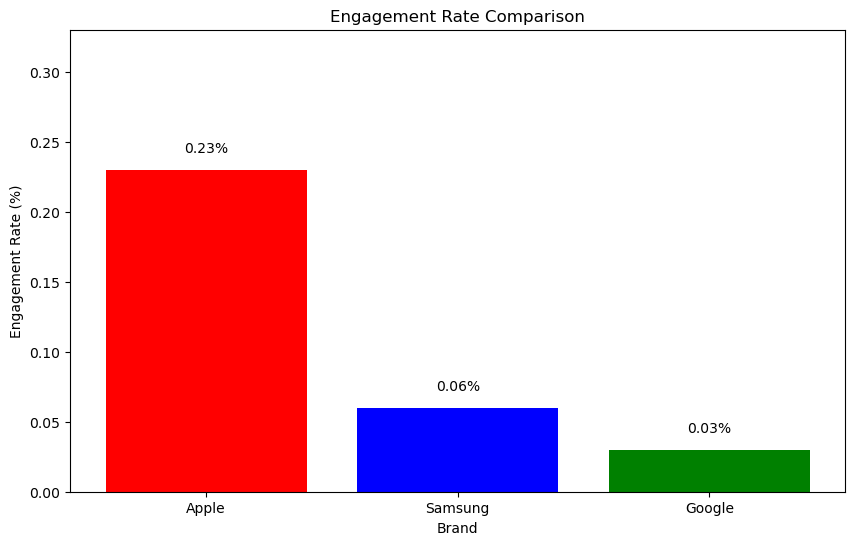

In [10]:
import matplotlib.pyplot as plt

def visualize_engagement_rates(engagement_data):
    brands = list(engagement_data.keys())
    rates = list(engagement_data.values())

    plt.figure(figsize=(10, 6))
    plt.bar(brands, rates, color=['red', 'blue', 'green'])
    plt.xlabel('Brand')
    plt.ylabel('Engagement Rate (%)')
    plt.title('Engagement Rate Comparison')
    plt.ylim(0, max(rates) + 0.1)  # add a little space at the top
    for i, rate in enumerate(rates):
        plt.text(i, rate + 0.01, f'{rate:.2f}%', ha='center', va='bottom')
    plt.show()

# Engagement data from your results
engagement_data = {
    'Apple': 0.23,
    'Samsung': 0.06,
    'Google': 0.03
}

visualize_engagement_rates(engagement_data)


# Sentiment Analysis of Comments
Analyze the sentiments of comments using the VADER tool from the NLTK library to classify them into positive, negative, and neutral categories.
# 

In [11]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [12]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

def analyze_comments_sentiments(comments):
    """
    Analyze the sentiments of comments using VADER.
    Returns the counts of positive, negative, and neutral comments.
    """
    sia = SentimentIntensityAnalyzer()
    sentiment_summary = {'positive': 0, 'negative': 0, 'neutral': 0}

    for comment in comments:
        score = sia.polarity_scores(comment)['compound']
        if score > 0.05:
            sentiment_summary['positive'] += 1
        elif score < -0.05:
            sentiment_summary['negative'] += 1
        else:
            sentiment_summary['neutral'] += 1

    return sentiment_summary

# Actual comments data from Apple, Samsung, and Google
apple_comments = [
    '#stopstealing from DRC', '🇨🇩🇨🇩🇨🇩🇨🇩🇨🇩', '🇵🇸🇵🇸🇵🇸🇵🇸🇵🇸', 'Free Congo 🇨🇩', 'Blocked for life suckas',
    '🔥🔥', 'So you go and kill Congo people to harvest their lands and then you post this to cover for all genocidal acts!!!',
    'BLOCKING 🇵🇸🇵🇸🇵🇸', '#blockout2024', 'Beautiful lady😍', '#blockout2024 Block genocide supporters. Block child killers.',
    '#congoisbleeding', 'Free kongo 🇨🇩🇨🇩 !!', 'Hipócritas #freecongo', '#ChopChop2024 #Digitine2024 🍉🇵🇸',
    'Congo is bleeding', 'What about my tanzanian 🇹🇿people',
    'Ghana, dont@let this post fool you, these people are causing child labour and suffering in Congo in order to make their products and now they want to pretend to pay image to you. When they’ll be done with CONGO they WILL find a place to suck blood from, and that could be you.',
    '❤️❤️❤️', 'so beautifulll🔥🔥🔥'
]

samsung_comments = [
    "You well I have a new phone charger you ransomware battery burning Instagram warfare bunch of fuckin corpses waiting so I guess we'll see",
    '@samsung porfavor denos información y solución para los #samsungA23.', 'My phone has got Green Line, even without updating the software. To correct it/ change the screen, I have to pay a big amount. Instead of launching new mobiles every few months, you should rectify the existing issues on your phones.',
    'Bring us resident evil games', 'Resident evil',
    'Cuál es la solución a nivel global para las personas que tenemos Samsung A23 ???? Van hacer una nueva actualización o van a reponer el equipo????',
    '@rehyming Me pasó lo mismo 😢', '@braidymichell_ SÍ 😢', '@_lioness500_ OMG, samee. All my pictures and memories 😭',
    'Necesitamos respuestas a los Samsung A23 que no encendieron mas después de la actualización 😒😒😒😒',
    'Artificial Intelligence everywhere. 🎉', 'Q le hiciste a los emojis 😭😭😭',
    "I hate the new update it's gonna make me snap the fkkin phone in half the gesture on the bottom buttons have changed the swipe feature is horrible I hate it and now I really don't even want to use my phone there should be an. Option to update or remove and update and and update should never change previous user settings thanks for ruining my day and my phone",
    '@samsung It should be illegal to sell phones without a charger! After spending $1,400 and then some more dollars, we need to spend more on a charger? 😡 #Ridiculous #ChargerGate',
    'Deben responder por la falla que tienen con la última actualización del A23, como es posible que un teléfono relativamente nuevo esté dañado por culpa de su misma marca. EXIGIMOS UNA SOLUCION.', 'saquen un samsung folder 3, quiero ser aeatetik 5g ☹️😓',
    'New Folder phone when?', 'Selamat Pagi,\nGimana kabarnya nih bunda/kakak/pak?\nSemoga sehat selalu. Aamiin\n*Mau informasiin sedikit nih Promo Cashback dan Berhadiah Speaker Bluetooth nya Ori Bcare*✨✨\n- Double Promo Samsung Galaxy S23 256 normal 13.999.000 promo jadi 10.499.000 CASHBACK 3,5JT tambahan Hadiah Speaker Bluetooth\n- Samsung Galaxy S23 FE 256 CASHBACK 1JT NORMAL 9.999.000 JADI 8.999.000 TAMBAHAN FREE SPEAKER BLUETOOTH✨✨\n- Samsung Galaxy A15 Jaringan 5G Ram 16GB rom 256GB Promo cashback 300k normal 3.299.000 kini 2.999.000 dan Free Speaeker Bluetooth'
]

google_comments = [
    '#BLOCKED2024 the block party welcomes you. 🇨🇩#freecongo', '#BLOCKED2024 the block party welcomes you. 🇨🇩#freecongo', '#blockout2024', '#blockout2024',
    'Pagi future office 😍', 'Kurdistan flaggg🇹🇯🇹🇯🇹🇯', 'Kurdistan flaggg🇹🇯🇹🇯🇹🇯',
    '🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯✌️✌️💚☀️❤️ Add the Kurdistan flag to our emojis #kurdistan', '🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯✌️✌️💚☀️❤️ Add the Kurdistan flag to our emojis #kurdistan', '🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯✌️✌️💚☀️❤️ Add the Kurdistan flag to our emojis #kurdistan',
    '', '', '', 'GOOGLE PLEASE I NEED HELP SUPPORT MY ACCOUNT HAA BEEN HACKED', '',
    'Lollolololololololloloolkko', 'Your Husband loves u liar!❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️', 'Blocklist 2024', '', '“Hey google, why are you trying to rewrite history?”'
]

# Analyze sentiments
apple_sentiments = analyze_comments_sentiments(apple_comments)
samsung_sentiments = analyze_comments_sentiments(samsung_comments)
google_sentiments = analyze_comments_sentiments(google_comments)

print(f"Apple Sentiments: {apple_sentiments}")
print(f"Samsung Sentiments: {samsung_sentiments}")
print(f"Google Sentiments: {google_sentiments}")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...


Apple Sentiments: {'positive': 3, 'negative': 5, 'neutral': 12}
Samsung Sentiments: {'positive': 2, 'negative': 6, 'neutral': 10}
Google Sentiments: {'positive': 4, 'negative': 0, 'neutral': 16}


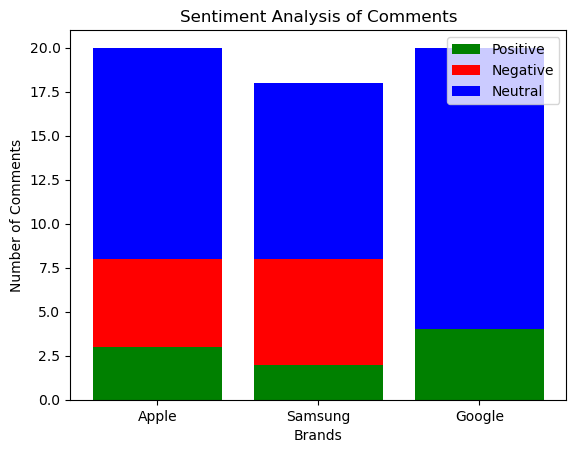

In [13]:
import matplotlib.pyplot as plt

def plot_sentiment_results(results):
    brands = list(results.keys())
    positives = [result['positive'] for result in results.values()]
    negatives = [result['negative'] for result in results.values()]
    neutrals = [result['neutral'] for result in results.values()]

    x = range(len(brands))
    plt.bar(x, positives, color='g', label='Positive')
    plt.bar(x, negatives, bottom=positives, color='r', label='Negative')
    plt.bar(x, neutrals, bottom=[i+j for i,j in zip(positives, negatives)], color='b', label='Neutral')

    plt.xlabel('Brands')
    plt.ylabel('Number of Comments')
    plt.title('Sentiment Analysis of Comments')
    plt.xticks(x, brands)
    plt.legend()
    plt.show()

# Example usage
results = {'Apple': apple_sentiments, 'Samsung': samsung_sentiments, 'Google': google_sentiments}
plot_sentiment_results(results)


# # Historical Data Collection
Fetch and store the last 50 posts for each brand to analyze historical engagement trends.


In [14]:
pip install pandas openpyxl


Note: you may need to restart the kernel to use updated packages.


In [16]:
from instagrapi import Client
import pandas as pd
from datetime import datetime

def fetch_historical_data_to_excel(username, post_count):
    cl = Client()
    cl.login('id', 'password')  # Replace with your credentials

    user_id = cl.user_id_from_username(username)
    posts = cl.user_medias(user_id, amount=post_count)

    # Create a list to store post data
    data = []
    for post in posts:
        data.append({
            'Post ID': post.id,
            'Date Posted': post.taken_at.strftime('%Y-%m-%d %H:%M:%S'),  # Format datetime for readability
            'Likes': post.like_count,
            'Comments': post.comment_count,
            'Caption': post.caption_text if post.caption_text else "",
            'URL': f"https://www.instagram.com/p/{post.code}/"
        })

    # Convert the list of data into a pandas DataFrame
    df = pd.DataFrame(data)

    # Write the DataFrame to an Excel file
    excel_filename = fr'C:\Users\A\Desktop\Hiral Project\Social media analysis\{username}_historical_data.xlsx'
    df.to_excel(excel_filename, index=False)

    return f"Data saved to {excel_filename}"

# Example usage
fetch_historical_data_to_excel('apple', 50)
fetch_historical_data_to_excel('samsung', 50)
fetch_historical_data_to_excel('google', 50)


'Data saved to C:\\Users\\A\\Desktop\\Hiral Project\\Social media analysis\\google_historical_data.xlsx'

In [17]:
import pandas as pd

# Load the data
apple_data = pd.read_excel(r'C:\Users\A\Desktop\Hiral Project\Social media analysis\apple_historical_data.xlsx')
samsung_data = pd.read_excel(r'C:\Users\A\Desktop\Hiral Project\Social media analysis\samsung_historical_data.xlsx')
google_data = pd.read_excel(r'C:\Users\A\Desktop\Hiral Project\Social media analysis\google_historical_data.xlsx')

# Display the first few rows to confirm the data
print(apple_data.head())
print(samsung_data.head())
print(google_data.head())


                          Post ID          Date Posted   Likes  Comments  \
0  3364258921958479338_5821462185  2024-05-09 16:08:57   75037      1041   
1  3363523937801465097_5821462185  2024-05-08 16:03:15   59280       500   
2  3362925887900870437_5821462185  2024-05-07 20:03:02  114253       812   
3  3359188419162191280_5821462185  2024-05-02 16:14:46  122983      1021   
4  3358456438489164706_5821462185  2024-05-01 16:00:27   64579       410   

                                             Caption  \
0  “I wanted to show the power and beauty of a Gh...   
1  “I have been fascinated by the incredible dive...   
2  To celebrate the launch of the new iPad Pro, N...   
3  “Every time I see a horse in my dreams, I like...   
4  “Color evokes so many emotions, it’s the main ...   

                                        URL  
0  https://www.instagram.com/p/C6wP6o3xhXq/  
1  https://www.instagram.com/p/C6tozNiLe0J/  
2  https://www.instagram.com/p/C6rg0cKS-cl/  
3  https://www.instagr

# # Engagement Over Time Visualization
Plot the engagement trends over time for each brand using likes and comments data.


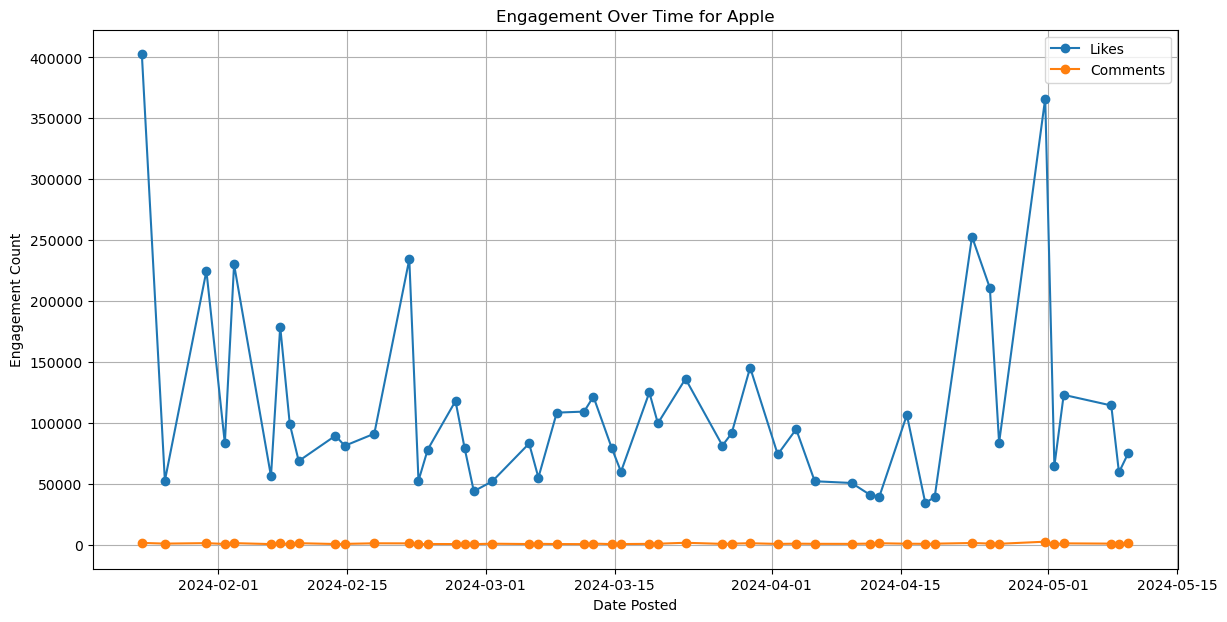

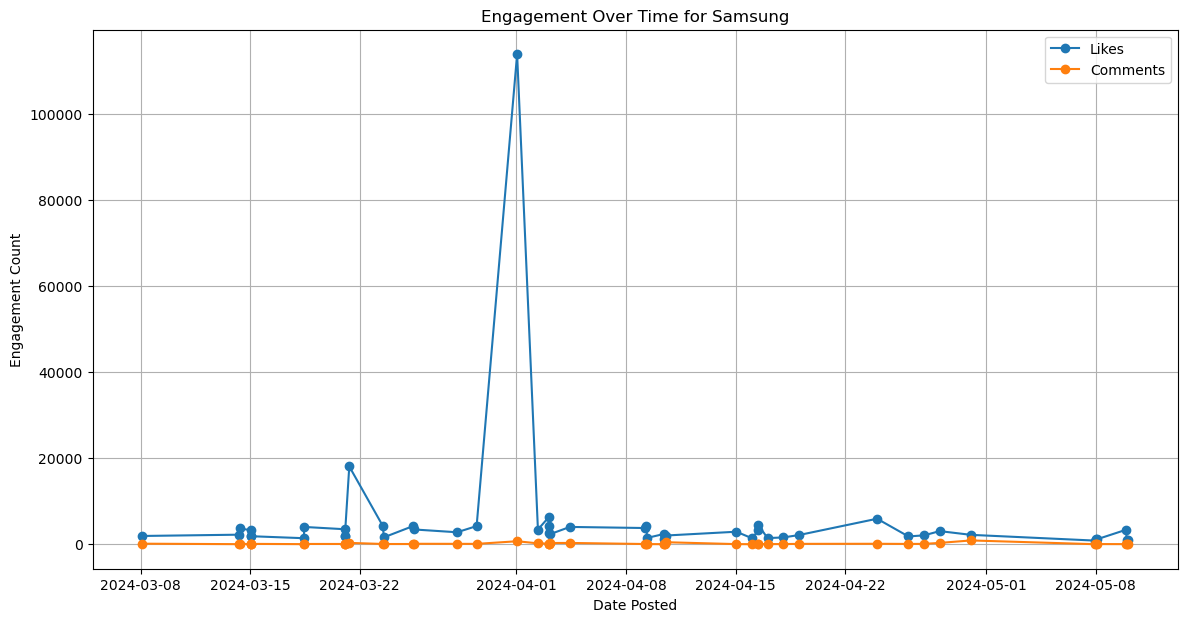

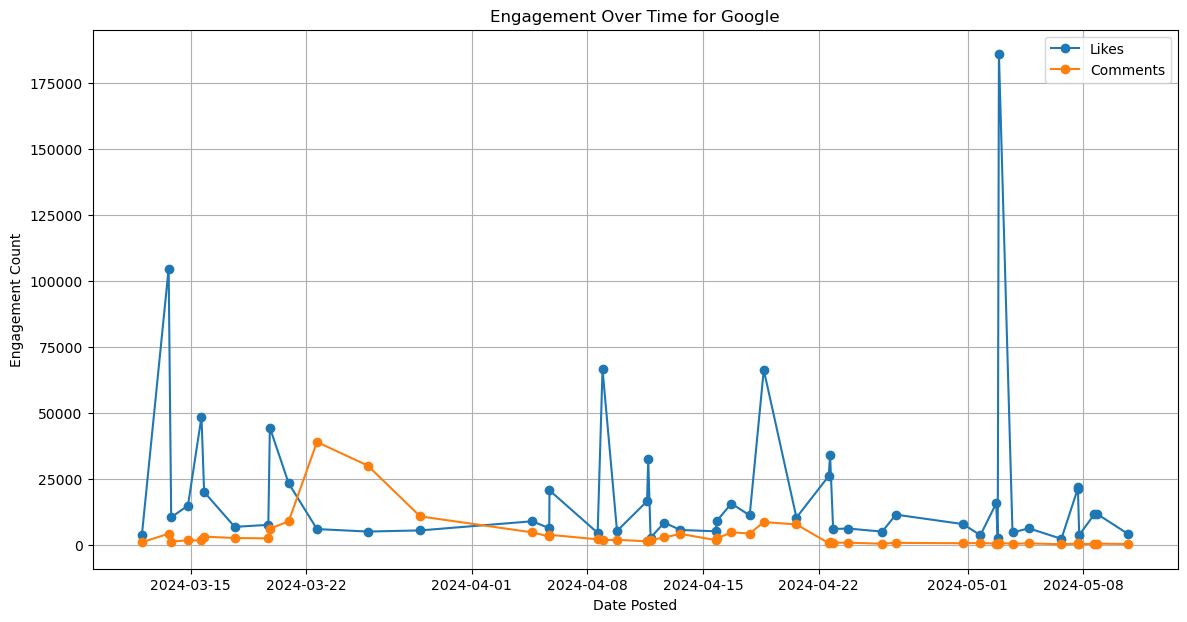

In [18]:
import matplotlib.pyplot as plt

def plot_engagement_over_time(data, brand_name):
    # Convert 'Date Posted' to datetime format
    data['Date Posted'] = pd.to_datetime(data['Date Posted'])
    
    # Sorting data by date
    data = data.sort_values('Date Posted')
    
    # Plotting
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date Posted'], data['Likes'], label='Likes', marker='o')
    plt.plot(data['Date Posted'], data['Comments'], label='Comments', marker='o')
    plt.title(f'Engagement Over Time for {brand_name}')
    plt.xlabel('Date Posted')
    plt.ylabel('Engagement Count')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot engagement for Apple
plot_engagement_over_time(apple_data, 'Apple')

# Plot engagement for Samsung
plot_engagement_over_time(samsung_data, 'Samsung')

# Plot engagement for Google
plot_engagement_over_time(google_data, 'Google')


# # Topic Modeling of Post Captions
Use Latent Dirichlet Allocation (LDA) to identify common topics within the captions of the posts for each brand.


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def extract_topics(data, n_topics=5, n_words=10):
    count_vect = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    dtm = count_vect.fit_transform(data['Caption'])
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
    lda.fit(dtm)
    
    # Displaying topics
    feature_names = count_vect.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        print(f"Topic #{topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]]))
        
# Apply topic extraction on Apple data
extract_topics(apple_data)


Topic #1:
like photography moment want time don choose convey beautiful city
Topic #2:
women new pro create max using photographer sustainable creating day
Topic #3:
apple iphone commissioned 15 pro music northlandscapes shot video fascinated
Topic #4:
beauty details like visual artistic shots storytelling color love comes
Topic #5:
nature photographs interesting power emotions life color character things simple


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def extract_topics(data, n_topics=5, n_words=10):
    count_vect = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    dtm = count_vect.fit_transform(data['Caption'])
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
    lda.fit(dtm)
    
    # Displaying topics
    feature_names = count_vect.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        print(f"Topic #{topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]]))
        
# Apply topic extraction on samsung data
extract_topics(samsung_data)


Topic #1:
music home frame soundbar dolbyatmos customizabledesign wirelessspeaker qsymphony beautifulspeaker musicbeautifullyframed
Topic #2:
samsungtv lifestylescreen theframe lifestyletv arttv www art com make laundry
Topic #3:
8k neoqled8k upscaleeverymoment moment upscale samsungaitv neo qled experience mothersday
Topic #4:
ai bespoke new experience bespokeai samsungbespoke samsung_bespoke qled neo dolesslivemore
Topic #5:
windfree equilibrium newfound 2024 technology 16 newfoundequilibrium milandesignweek mdw2024 le


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def extract_topics(data, n_topics=5, n_words=10):
    count_vect = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    dtm = count_vect.fit_transform(data['Caption'])
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
    lda.fit(dtm)
    
    # Displaying topics
    feature_names = count_vect.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        print(f"Topic #{topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]]))
        
# Apply topic extraction on google data
extract_topics(google_data)


Topic #1:
link bio googleio 14 pt ai latest 10 updates google
Topic #2:
link bio tap today googledoodle learn help nature celebrates year
Topic #3:
pixel google connection app day new years work internet results
Topic #4:
bio link google world learn looking search turn help meet
Topic #5:
google tap app try swipe new eclipse link bio pro


# # Comparative Engagement Analysis
Compare the total engagement across Apple, Samsung, and Google, visualizing the combined likes and comments over time.


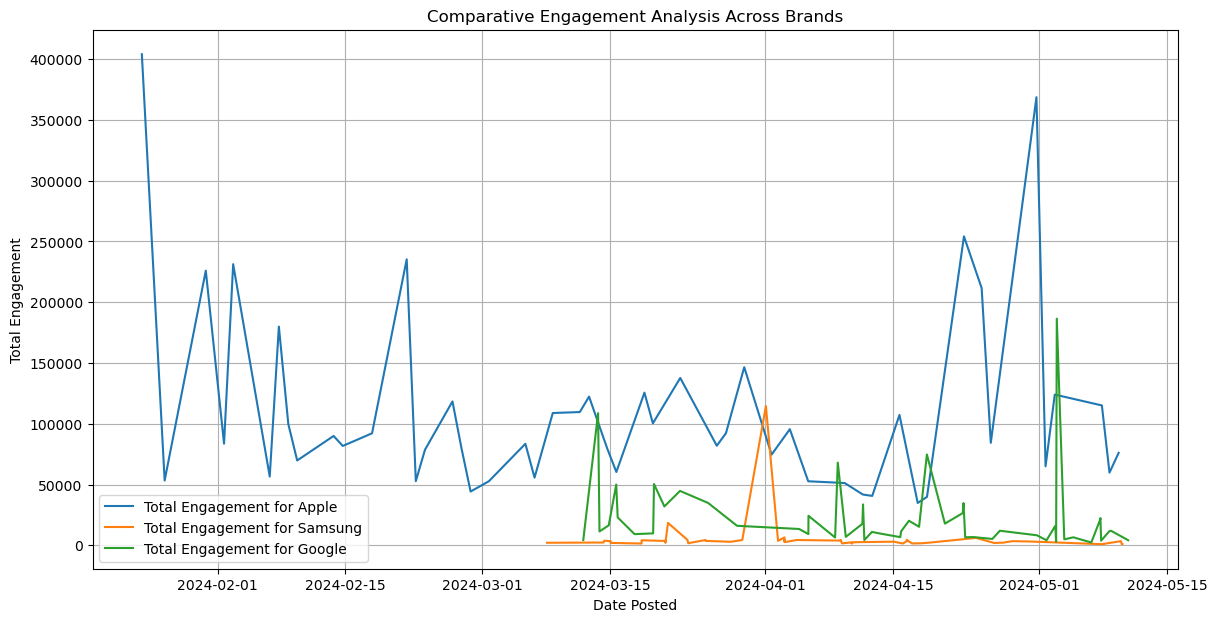

In [23]:
def compare_engagement(data_list, labels):
    plt.figure(figsize=(14, 7))
    for data, label in zip(data_list, labels):
        plt.plot(data['Date Posted'], data['Likes'] + data['Comments'], label=f'Total Engagement for {label}')
    
    plt.title('Comparative Engagement Analysis Across Brands')
    plt.xlabel('Date Posted')
    plt.ylabel('Total Engagement')
    plt.legend()
    plt.grid(True)
    plt.show()

# Comparing Apple, Samsung, and Google
compare_engagement([apple_data, samsung_data, google_data], ['Apple', 'Samsung', 'Google'])


# Seasonal Decomposition of Time-Series Data
Apply seasonal decomposition to the time-series data of likes for each brand to identify underlying patterns such as trends and seasonality.


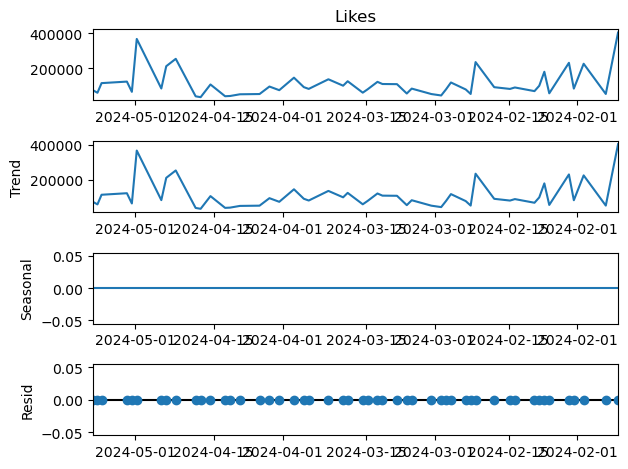

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Example of decomposing time-series data for Apple
apple_data['Date Posted'] = pd.to_datetime(apple_data['Date Posted'])
apple_data.set_index('Date Posted', inplace=True)
result = seasonal_decompose(apple_data['Likes'], model='additive', period=1)
result.plot()
plt.show()


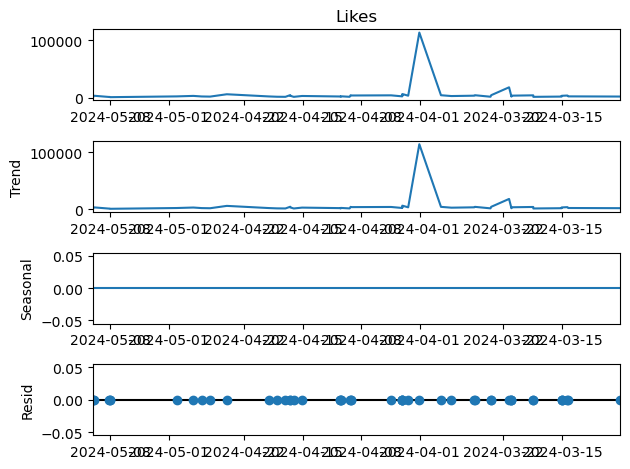

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Example of decomposing time-series data for samsung
samsung_data['Date Posted'] = pd.to_datetime(samsung_data['Date Posted'])
samsung_data.set_index('Date Posted', inplace=True)
result = seasonal_decompose(samsung_data['Likes'], model='additive', period=1)
result.plot()
plt.show()


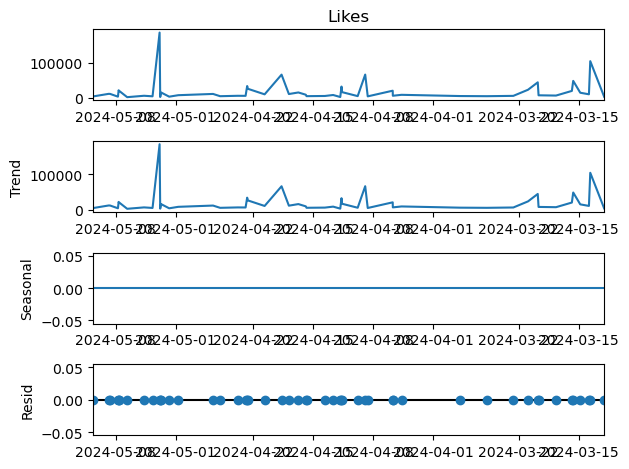

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Example of decomposing time-series data for google
google_data['Date Posted'] = pd.to_datetime(google_data['Date Posted'])
google_data.set_index('Date Posted', inplace=True)
result = seasonal_decompose(google_data['Likes'], model='additive', period=1)
result.plot()
plt.show()


# "Engagement Trend Analysis and Strategic Insights"

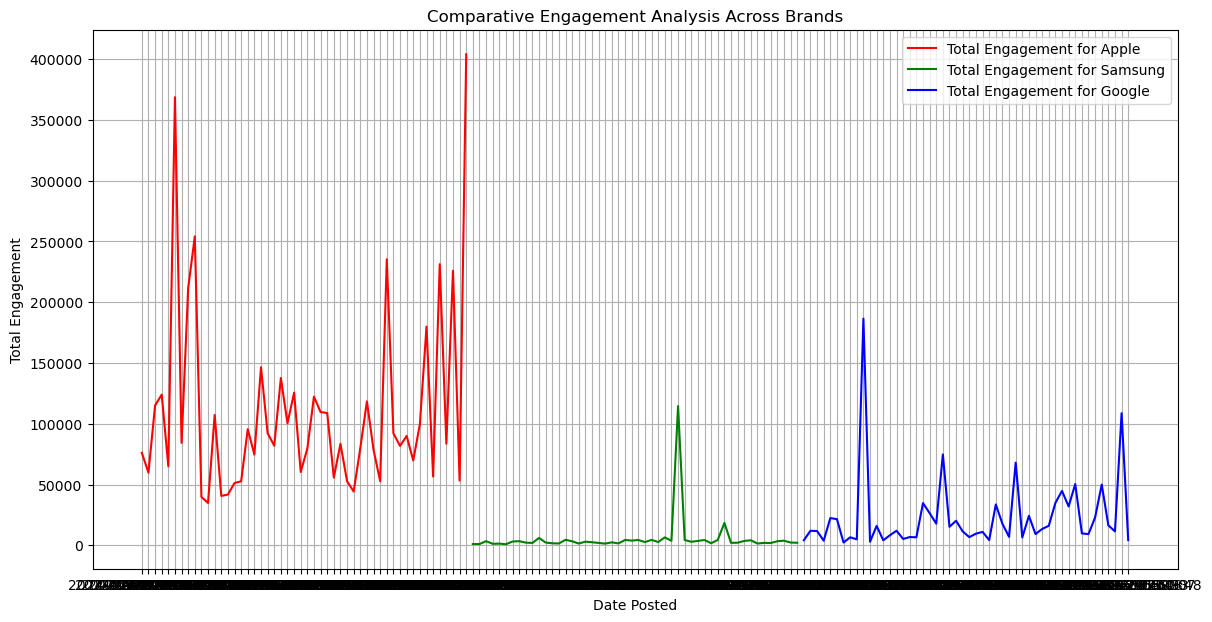


    ##Conclusion and Recommendations
    
    ###Summary of Findings
    - High Engagement: Apple's strategy is yielding the highest engagement, suggesting a strong alignment with audience preferences.
    - Sentiment Insights: Negative sentiments across brands indicate areas for improvement, particularly in customer service and product quality.
    - Trend Analysis: Seasonal trends suggest the optimal times for these brands to post to maximize engagement.
    
    ###Recommendations
    - Content Strategy: For Apple, continuing to leverage current strategies while incorporating more direct engagement could be beneficial.
    - Customer Feedback: Samsung and Google should address the negative sentiments in comments by enhancing transparency and customer service.
    - Posting Schedule: All brands could benefit from aligning their posting schedules with the observed peaks in engagement.
    
    ###Future Directions
    - Further analysis with a larger dataset over different platforms could provide more generalized insights.
    - Implementing machine learning models to predict engagement based on post characteristics could optimize content strategies.
    
    ###Reflection on Methodology
    - The methods used provided robust insights into brand performance on Instagram. However, the analysis would benefit from a broader sentiment analysis to capture subtler nuances of customer feedback.
    

In [32]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Load the data if needed
# Example: Assuming data is already loaded in variables apple_data, samsung_data, google_data
apple_data = pd.read_excel(r'C:\Users\A\Desktop\Hiral Project\Social media analysis\apple_historical_data.xlsx')
samsung_data = pd.read_excel(r'C:\Users\A\Desktop\Hiral Project\Social media analysis\samsung_historical_data.xlsx')
google_data = pd.read_excel(r'C:\Users\A\Desktop\Hiral Project\Social media analysis\google_historical_data.xlsx')

# Plot a summary visualization if needed
def plot_summary_statistics(data_list, labels):
    plt.figure(figsize=(14, 7))
    colors = ['red', 'green', 'blue']
    for data, label, color in zip(data_list, labels, colors):
        plt.plot(data['Date Posted'], data['Likes'] + data['Comments'], label=f'Total Engagement for {label}', color=color)
    
    plt.title('Comparative Engagement Analysis Across Brands')
    plt.xlabel('Date Posted')
    plt.ylabel('Total Engagement')
    plt.legend()
    plt.grid(True)
    plt.show()

# Display the summary plot
data_list = [apple_data, samsung_data, google_data]
labels = ['Apple', 'Samsung', 'Google']
plot_summary_statistics(data_list, labels)

# Summary and Recommendations
from IPython.display import Markdown, display

def display_conclusion():
    summary_text = """
    ##Conclusion and Recommendations
    
    ###Summary of Findings
    - High Engagement: Apple's strategy is yielding the highest engagement, suggesting a strong alignment with audience preferences.
    - Sentiment Insights: Negative sentiments across brands indicate areas for improvement, particularly in customer service and product quality.
    - Trend Analysis: Seasonal trends suggest the optimal times for these brands to post to maximize engagement.
    
    ###Recommendations
    - Content Strategy: For Apple, continuing to leverage current strategies while incorporating more direct engagement could be beneficial.
    - Customer Feedback: Samsung and Google should address the negative sentiments in comments by enhancing transparency and customer service.
    - Posting Schedule: All brands could benefit from aligning their posting schedules with the observed peaks in engagement.
    
    ###Future Directions
    - Further analysis with a larger dataset over different platforms could provide more generalized insights.
    - Implementing machine learning models to predict engagement based on post characteristics could optimize content strategies.
    
    ###Reflection on Methodology
    - The methods used provided robust insights into brand performance on Instagram. However, the analysis would benefit from a broader sentiment analysis to capture subtler nuances of customer feedback.
    """
    display(Markdown(summary_text))

display_conclusion()
